<a href="https://colab.research.google.com/github/Lobosoft/CDSMT/blob/main/Jupyter%20Notebooks%5CEstimaci%C3%B3n_de_tr%C3%A1fico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importar bibliotecas
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt

In [8]:
# Cargar los datos desde un archivo CSV
# Montamos la unidad donde se encuentra nuestro archivo de datos
from google.colab import drive
drive.mount('/content/drive')

# Leemos el archivo CSV
data = pd.read_csv("/content/drive/MyDrive/CDSMT/MockedTrafficData.csv", sep=",")

# Sin ser necesario, vamos a mostrar las primeras filas de los datos
print("Primeras filas del dataset:")
print(data.head())

# y a asegurarnos de que las columnas son las correctas
required_columns = ['Año', 'Día', 'Hora', 'SentidoNorte', 'SentidoSur']
if not all(col in data.columns for col in required_columns):
    raise ValueError(f"El CSV debe contener las columnas: {', '.join(required_columns)}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Primeras filas del dataset:
    Año  Día  Hora  SentidoNorte  SentidoSur
0  2019    1     0           370         274
1  2019    1     1           171         117
2  2019    1     2            72          99
3  2019    1     3           100         100
4  2019    1     4            72          86


In [9]:
# Seleccionamos las características (X) y la variable objetivo (y)
X = data[['Año', 'Día', 'Hora']]  # Año, Día, Hora como características
y = data['SentidoNorte']  # Tráfico en SentidoNorte como objetivo

# Dividimos los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenamos un modelo de regresión (Random Forest, en este caso)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [10]:
#Elaboramos las predicciones
y_pred = model.predict(X_test)

# Y evaluamos el modelo
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r2}")



Mean Absolute Error (MAE): 206.4827958523592
R-squared (R2): 0.9438167824473662


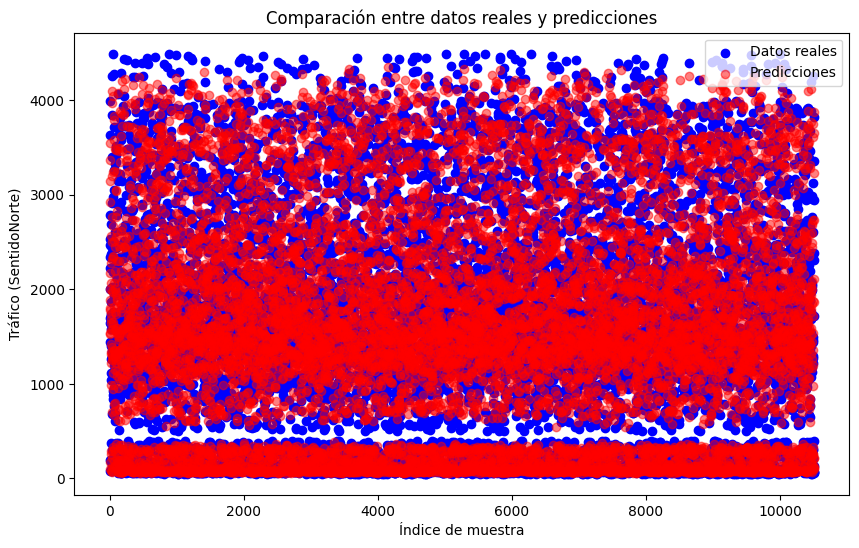

In [11]:
# Visualizamos los resultados
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Datos reales')
plt.scatter(range(len(y_test)), y_pred, color='red', alpha=0.5, label='Predicciones')
plt.legend()
plt.title('Comparación entre datos reales y predicciones')
plt.xlabel('Índice de muestra')
plt.ylabel('Tráfico (SentidoNorte)')
plt.show()



In [12]:
# Podemos predecir el tráfico para un día y hora específicos
def predecir_trafico(año, día, hora):
    prediccion = model.predict([[año, día, hora]])
    print(f"Predicción para Año={año}, Día={día}, Hora={hora}: {prediccion[0]} vehículos")
    return prediccion[0]

# Ejemplo de predicción:
predecir_trafico(2024, 200, 15)  # Año 2024, día 200 del año (19 de julio), hora, 15 de la tarde

predecir_trafico(2025, 15, 20)  # Año 2025, día 150 del año (15 de enero), hora, 20 de la tarde


Predicción para Año=2024, Día=200, Hora=15: 2798.21 vehículos
Predicción para Año=2025, Día=15, Hora=20: 2850.49 vehículos


2850.49